In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random
import pickle
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import keras
import sys


Using TensorFlow backend.


In [2]:
filename = '/home/sxz/data/geolife_Data/paper2_data_for_DL_kfold_dataset_RL_augment.pickle'
with open(filename, 'rb') as f:
    kfold_dataset, X_unlabeled = pickle.load(f)

In [4]:
#抽不同数量的label data出来
#抽更多的unlabel data出来

In [6]:
print(np.shape(X_unlabeled))
raw_ulcluster = X_unlabeled.reshape(len(X_unlabeled),992)

(30406, 1, 248, 4)


In [7]:
pca_ = PCA(n_components=2)

In [8]:
unlabel_pca = pca_.fit_transform(raw_ulcluster)

In [9]:
np.shape(unlabel_pca)

(30406, 2)

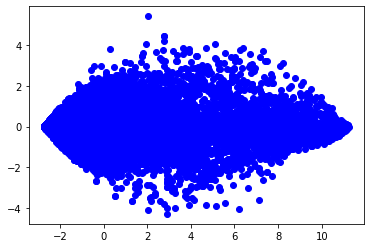

In [10]:
plt.plot(unlabel_pca[:,0],unlabel_pca[:,1],'o',color='blue')

In [5]:
# print(np.shape(kfold_dataset[0][0]))
raw_cluster = np.concatenate((kfold_dataset[0][0],kfold_dataset[0][2]),axis=0)
print(np.shape(raw_cluster))
label_ = np.concatenate((kfold_dataset[0][1],kfold_dataset[0][4]),axis=0)
print(np.shape(label_))

(4285, 1, 248, 4)
(4285,)


In [6]:
print(np.array(raw_cluster).shape)

(4285, 1, 248, 4)


In [7]:
raw_cluster = raw_cluster.reshape(len(raw_cluster),992)

In [8]:
pca_ = PCA(n_components=2)

In [9]:
encode_ = pca_.fit_transform(raw_cluster)

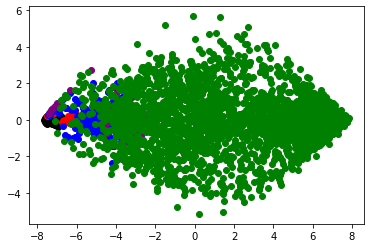

In [10]:
plt.plot(encode_[label_==0,0],encode_[label_==0,1],'o',color='black')
plt.plot(encode_[label_==1,0],encode_[label_==1,1],'o',color='red')
plt.plot(encode_[label_==2,0],encode_[label_==2,1],'o',color='blue')
plt.plot(encode_[label_==3,0],encode_[label_==3,1],'o',color='purple')
plt.plot(encode_[label_==4,0],encode_[label_==4,1],'o',color='green')

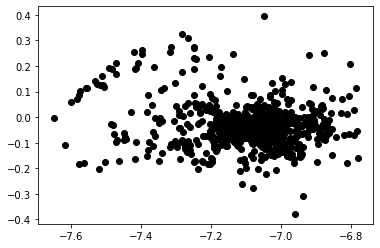

In [11]:
plt.plot(encode_[label_==0,0],encode_[label_==0,1],'o',color='black')

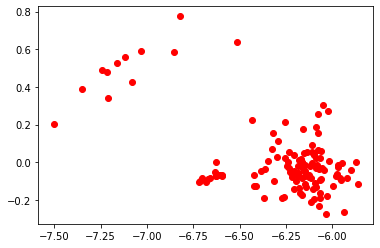

In [12]:
plt.plot(encode_[label_==1,0],encode_[label_==1,1],'o',color='red')

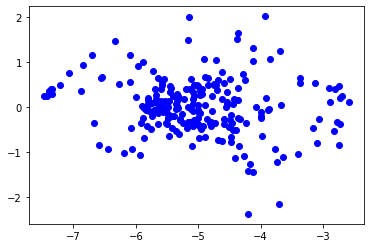

In [13]:
plt.plot(encode_[label_==2,0],encode_[label_==2,1],'o',color='blue')

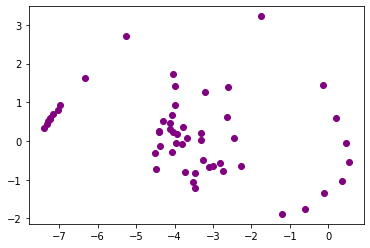

In [14]:
plt.plot(encode_[label_==3,0],encode_[label_==3,1],'o',color='purple')

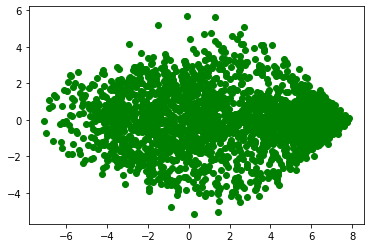

In [15]:
plt.plot(encode_[label_==4,0],encode_[label_==4,1],'o',color='green')

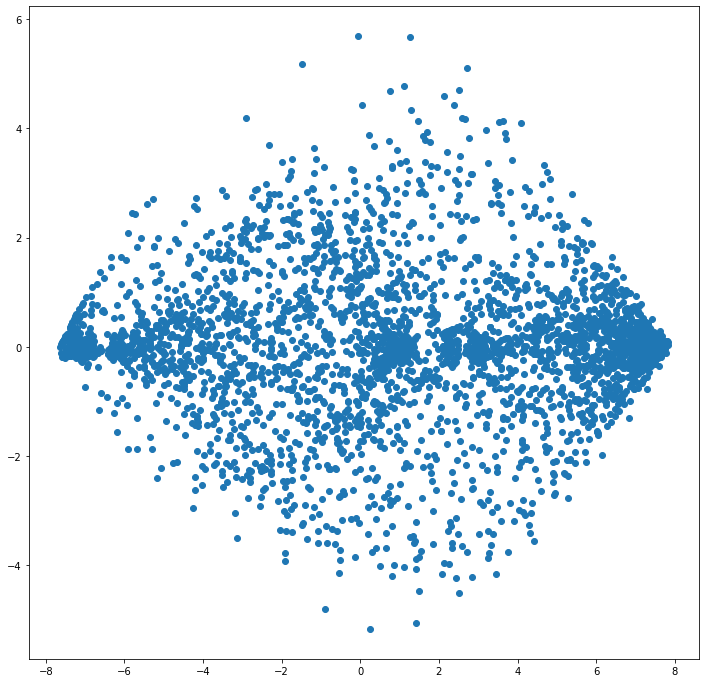

In [127]:
plt.figure(figsize=[12,12])
plt.scatter(x = [i[0] for i in encode_],y = [i[1] for i in encode_])

(4285,)


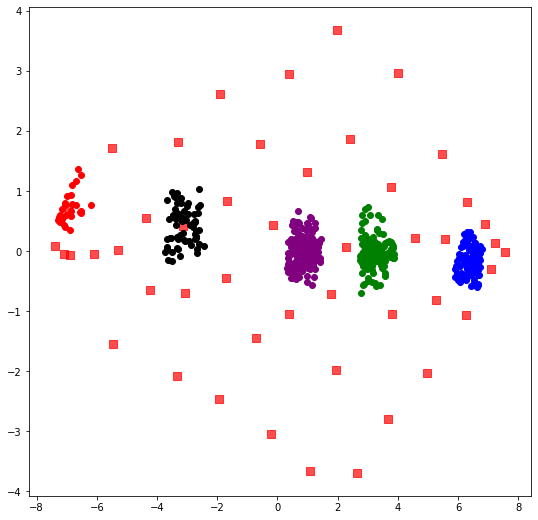

In [133]:
plt.figure(figsize=[9,9])
cluster_num=50
km5 = KMeans(n_clusters=cluster_num, init='random',max_iter=300,n_init=10,random_state=0)
encode_means = km5.fit_predict(encode_)
print(np.array(encode_means).shape)
plt.plot(encode_[encode_means==0,0],encode_[encode_means==0,1],'o',color='black')
plt.plot(encode_[encode_means==1,0],encode_[encode_means==1,1],'o',color='red')
plt.plot(encode_[encode_means==2,0],encode_[encode_means==2,1],'o',color='blue')
plt.plot(encode_[encode_means==3,0],encode_[encode_means==3,1],'o',color='purple')
plt.plot(encode_[encode_means==4,0],encode_[encode_means==4,1],'o',color='green')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=50,marker='s', c='red',
            alpha=0.7, label='Centroids')

In [134]:
def select_label(cluster_set , cluster_center):
    minimun = 100
    distance = np.sqrt(np.sum(np.square(cluster_set[i] , cluster_center)))

In [135]:
mini = np.zeros((cluster_num), dtype=np.float)
mini_coodinate = np.zeros((cluster_num,2), dtype=np.float)

In [136]:
for i in range(cluster_num):
    mini[i] = 100
count = 0
for j in range(cluster_num):
    for i in range(len(encode_[encode_means==j])):
            if(mini[j] >(np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))):
                mini[j] = (np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))
                mini_coodinate[j] = encode_[encode_means==j][i]
cluster_fake = np.zeros(cluster_num,)
for j in range(cluster_num):
    for i in range(len(encode_)):
        if(mini_coodinate[j][0] == encode_[i][0]):
            print(i)
            print(label_[i])
            cluster_fake[j] = label_[i]
label_fake = np.zeros(len(raw_cluster),)
for i in range(cluster_num):
    label_fake[encode_means==i] =cluster_fake[i]
count = 0
for i in range(len(label_)):
    if(label_fake[i] == label_[i]):
        count = count+1
print(count)
print('accuracy for PCA is : {}'.format(count/len(raw_cluster)))

4048
4
3787
4
2517
4
34
4
1457
4
233
4
2983
4
3800
4
4077
4
499
4
531
4
1479
4
1326
4
3041
4
2100
0
2745
4
1780
3
511
4
1168
4
173
4
4051
4
3257
4
3464
0
3973
4
248
4
4063
4
2492
4
2369
4
3084
4
1497
4
1129
4
1427
4
891
4
3916
4
3234
4
2304
4
2818
3
288
4
3784
4
3951
4
3048
4
979
4
3008
4
3607
2
1623
1
1711
3
738
0
3903
4
2773
4
3940
4
3883
accuracy for PCA is : 0.9061843640606768


In [112]:
raw_cluster =[]

In [71]:
kfold_dataset[0][2].shape

(110, 1, 248, 4)

In [18]:
raw_cluster = kfold_dataset[0][2].reshape(110,992)

In [19]:
raw_cluster = np.vstack((raw_cluster, kfold_dataset[4][2].reshape(len(kfold_dataset[4][2]),992)))

In [20]:
print()

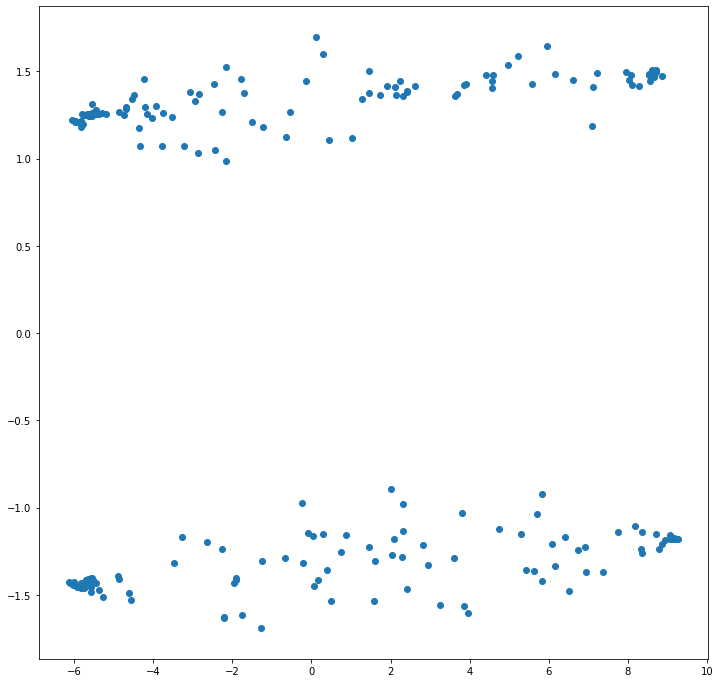

In [21]:
pca_ = PCA(n_components=2)
encode_ = pca_.fit_transform(raw_cluster)
plt.figure(figsize=[12,12])
plt.scatter(x = [i[0] for i in encode_],y = [i[1] for i in encode_])

(220,)


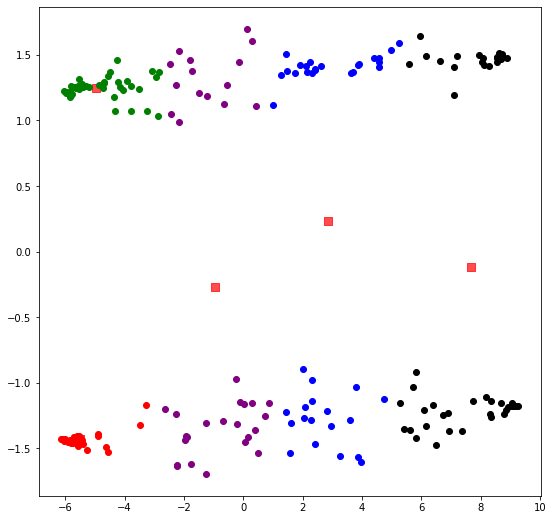

In [22]:
plt.figure(figsize=[9,9])
km5 = KMeans(n_clusters=5, init='random',max_iter=300,n_init=10,random_state=0)
encode_means = km5.fit_predict(encode_)
print(np.array(encode_means).shape)
plt.plot(encode_[encode_means==0,0],encode_[encode_means==0,1],'o',color='black')
plt.plot(encode_[encode_means==1,0],encode_[encode_means==1,1],'o',color='red')
plt.plot(encode_[encode_means==2,0],encode_[encode_means==2,1],'o',color='blue')
plt.plot(encode_[encode_means==3,0],encode_[encode_means==3,1],'o',color='purple')
plt.plot(encode_[encode_means==4,0],encode_[encode_means==4,1],'o',color='green')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=50,marker='s', c='red',
            alpha=0.7, label='Centroids')

In [23]:
def select_label(cluster_set , cluster_center):
    minimun = 100
    distance = np.sqrt(np.sum(np.square(cluster_set[i] , cluster_center)))

In [24]:
mini = np.zeros((5), dtype=np.float)
mini_coodinate = np.zeros((5,2), dtype=np.float)
mini = [100,100,100,100,100]
count = 0
for j in range(5):
    for i in range(len(encode_[encode_means==j])):
            if(mini[j] >(np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))):
                mini[j] = (np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))
                mini_coodinate[j] = encode_[encode_means==j][i]
cluster_fake = np.zeros(5,)
for j in range(5):
    for i in range(len(encode_)):
        if(mini_coodinate[j][0] == encode_[i][0]):
            print(i)
            print(label_[i])
            cluster_fake[j] = label_[i]
label_fake = np.zeros(551,)
for i in range(5):
    label_fake[encode_means==i] =cluster_fake[i]
count = 0
for i in range(len(label_)):
    if(label_fake[i] == label_[i]):
        count = count+1
print(count)
print('accuracy for PCA is : {}'.format(count/551))

182


IndexError: index 182 is out of bounds for axis 0 with size 110